Optimizing w and b using gradient descent 


In [4]:
import math, copy 
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients


| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [5]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

## compute_cost

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

In [9]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w*x[i] + b
        cost += (f_wb - y[i])**2
    
    total_cost = 1/(2*m) * cost
    return total_cost

## compute_gradient  
$$ \begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align} $$

In [10]:
def compute_gradients(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    total_dj_dw = 1/m * dj_dw
    total_dj_db = 1/m * dj_db
    return total_dj_dw, total_dj_db

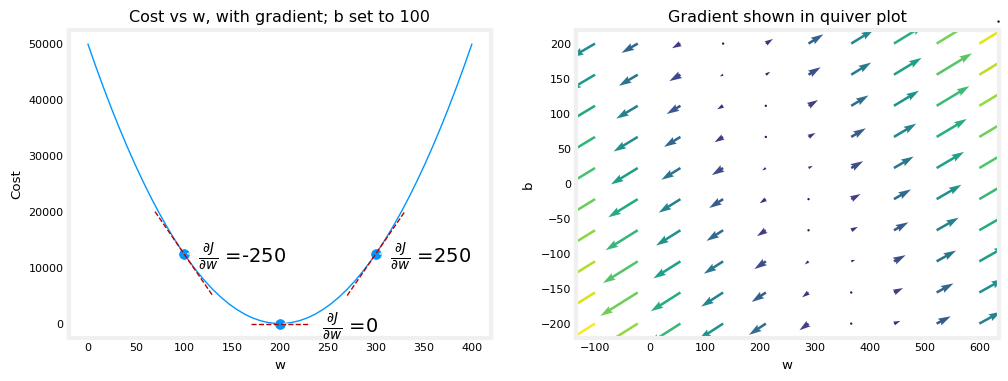

In [11]:
plt_gradients(x_train, y_train, compute_cost, compute_gradients)
plt.show()

## gradient_desent

utilises compute_gradient and compute_cost

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [13]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iterations, cost_function, gradient_function):
    J_history = []
    p_history = []

    b = b_in
    w = w_in

    for i in range(num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000: # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        
        if i% math.ceil(num_iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

In [16]:
w_init = 0.0
b_init = 0.0


iterations = 100000
temp_alpha = 10**-2

w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, temp_alpha, iterations, compute_cost, compute_gradients)
print(f"Final w: {w_final:8.4f}, Final b: {b_final:8.4f}")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 10000: Cost 6.74e-06  dj_dw: -5.215e-04, dj_db:  8.439e-04   w:  2.000e+02, b: 1.00012e+02
Iteration 20000: Cost 3.09e-12  dj_dw: -3.532e-07, dj_db:  5.714e-07   w:  2.000e+02, b: 1.00000e+02
Iteration 30000: Cost 1.42e-18  dj_dw: -2.393e-10, dj_db:  3.869e-10   w:  2.000e+02, b: 1.00000e+02
Iteration 40000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 50000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 60000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 70000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 80000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 90000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.0

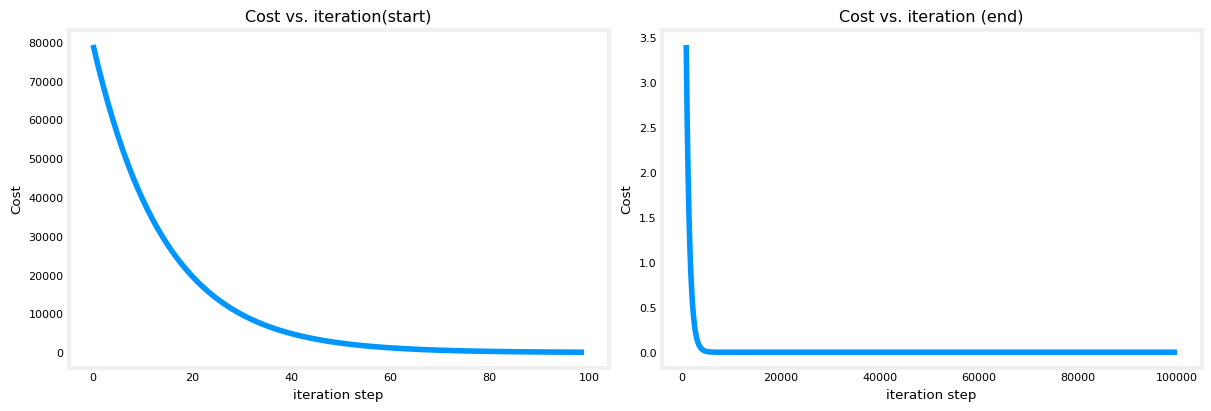

In [18]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [19]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


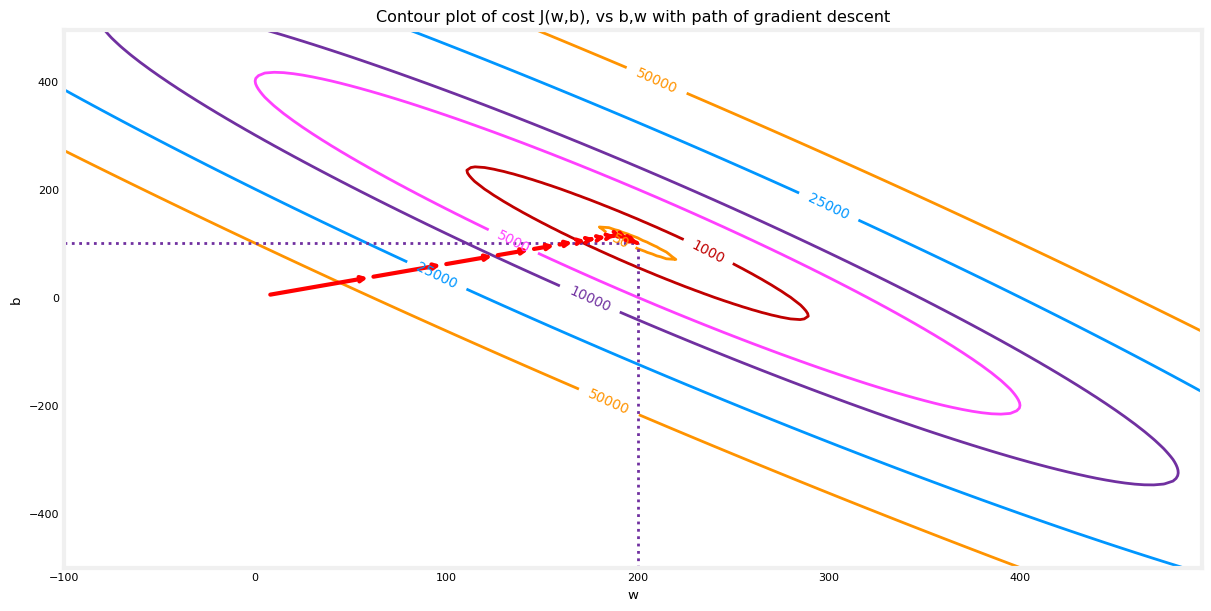

In [21]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12,6))
plt_contour_wgrad(x_train, y_train,  p_history, ax)

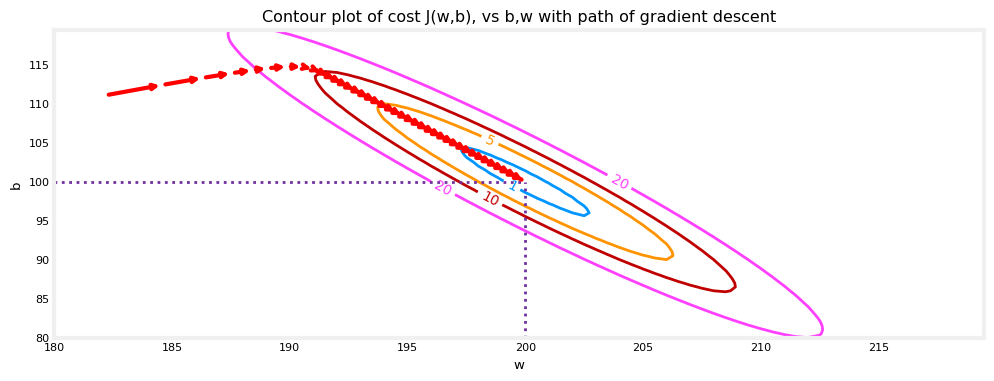

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_history, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [25]:
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradients)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


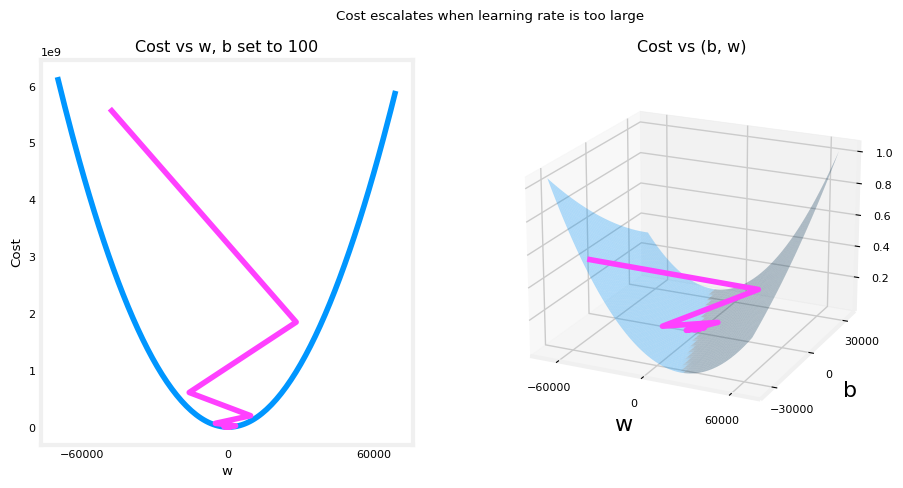

In [26]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()